In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
df = pd.read_csv('all_exp_df.csv')
df = df.drop(columns=[c for c in df.columns if 'Unnamed' in c])
df

,test_classifier_fit_time,test_feature_selector_fit_time,test_acc,test_mcc,test_roc_auc,test_pr_auc,test_mean_inference_time,dataset,n_samples,n_features_org,cv_method,learning_algorithm,filtering_algorithm,n_selected_features,selected_features_names,selected_features_scores
0,0.001552,0.014603,0.930556,0.848620,0.952340,0.958263,0.000714,ALLAML.csv,72,7129,LeaveOneOut(),GaussianNB,select_fdr_fs,1,1881,216.7237
1,0.001559,0.015855,0.958333,0.907651,0.994043,0.989402,0.000695,ALLAML.csv,72,7129,LeaveOneOut(),GaussianNB,select_fdr_fs,2,"1881,2287","216.7237,198.9983"
2,0.001659,0.017396,0.930556,0.848620,0.993191,0.988151,0.000736,ALLAML.csv,72,7129,LeaveOneOut(),GaussianNB,select_fdr_fs,3,"1881,2287,3251","216.7237,198.9983,185.3939"
3,0.001565,0.013124,0.958333,0.907651,0.993191,0.988151,0.000700,ALLAML.csv,72,7129,LeaveOneOut(),GaussianNB,select_fdr_fs,4,"1881,2287,3251,1833","216.7237,198.9983,185.3939,174.7985"
4,0.001660,0.014022,0.944444,0.877447,0.994894,0.990794,0.000736,ALLAML.csv,72,7129,LeaveOneOut(),GaussianNB,select_fdr_fs,5,"1881,2287,3251,1833,4846","216.7237,198.9983,185.3939,174.7985,155.4472"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78584,0.139613,703.013036,0.900000,0.816497,0.840000,0.776667,0.072681,singh_inputs.csv,102,12600,"StratifiedKFold(n_splits=10, random_state=42, ...",RandomForestClassifier,svm_fs_Aug,3,"6184,11857,7538","1.0000,0.9999,0.9998"
78585,0.128810,813.998643,0.900000,0.816497,1.000000,1.000000,0.062646,singh_inputs.csv,102,12600,"StratifiedKFold(n_splits=10, random_state=42, ...",RandomForestClassifier,svm_fs_Aug,3,"6184,7622,10233","1.0000,0.9999,0.9998"
78586,0.158858,646.426888,0.900000,0.816497,1.000000,1.000000,0.071802,singh_inputs.csv,102,12600,"StratifiedKFold(n_splits=10, random_state=42, ...",RandomForestClassifier,svm_fs_Aug,3,"6184,10671,10233","1.0000,0.9999,0.9998"
78587,0.118865,821.549181,1.000000,1.000000,1.000000,1.000000,0.058886,singh_inputs.csv,102,12600,"StratifiedKFold(n_splits=10, random_state=42, ...",RandomForestClassifier,svm_fs_Aug,3,"6184,7622,9092","1.0000,0.9999,0.9998"


# Analyze Metrics

## ROC_AUC

### Best Scores per Dataset

In [244]:
metric_col = 'test_roc_auc'

mean_df = df[~df['filtering_algorithm'].str.endswith('_Aug')].groupby(['dataset', 'filtering_algorithm', 'n_selected_features'])[metric_col].mean().reset_index()
max_df = mean_df.groupby(['dataset']).max()[metric_col].reset_index().join(mean_df.set_index(['dataset', metric_col]), on=['dataset', metric_col])
max_df

,dataset,test_roc_auc,filtering_algorithm,n_selected_features
0,ALL.csv,0.570561,reliefF_fs,1
1,ALLAML.csv,1.000000,poly_svm_fs,30
1,ALLAML.csv,1.000000,rfe_svm_fs,20
1,ALLAML.csv,1.000000,rfe_svm_fs,25
1,ALLAML.csv,1.000000,rfe_svm_fs,30
...,...,...,...,...
19,pomeroy_inputs.csv,0.992063,svm_fs_New,20
20,singh_inputs.csv,0.971600,svm_fs,3
21,sorlie_inputs.csv,0.983391,svm_fs,100
22,subramanian_inputs.csv,1.000000,svm_fs,15


### Scores Histograms per Filtering Algorithm

<AxesSubplot:xlabel='test_roc_auc', ylabel='Count'>

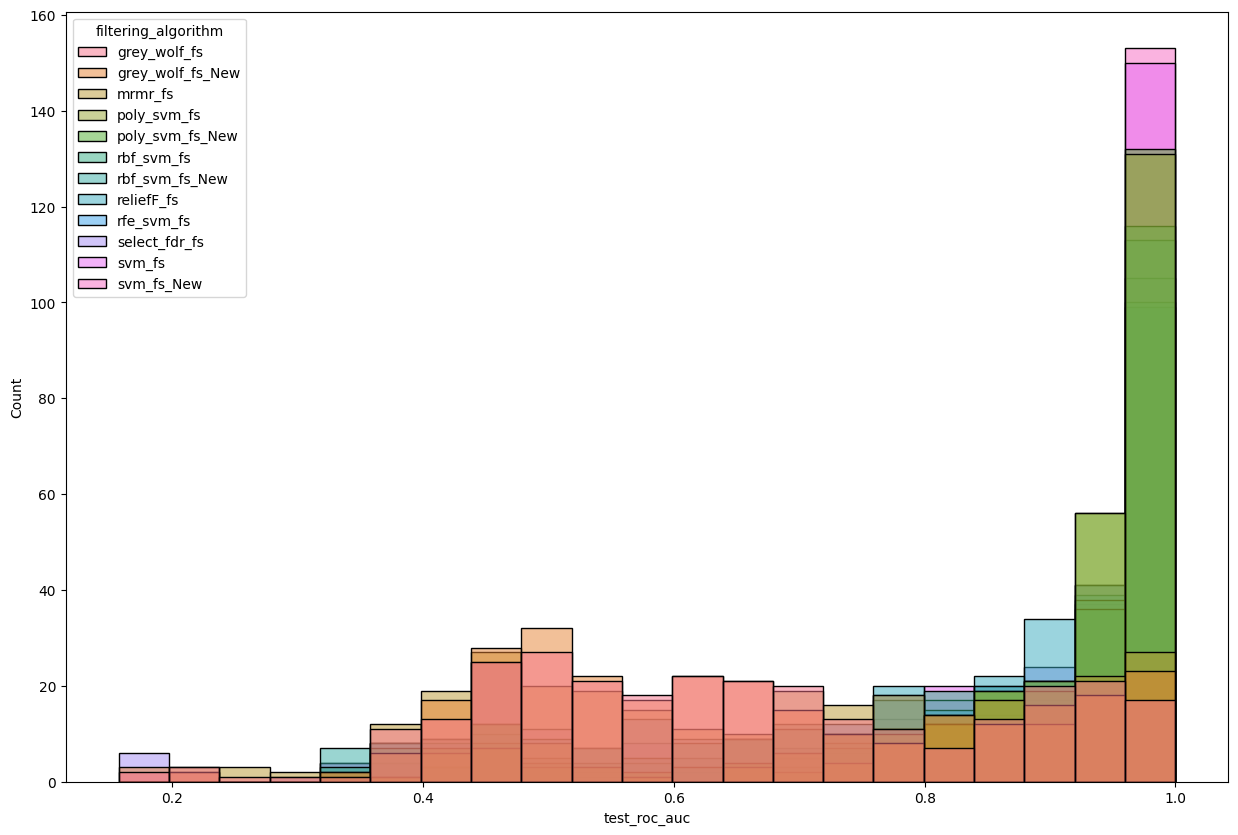

In [245]:
plt.figure(figsize=(15,10))
sns.histplot(data=mean_df, x=metric_col, hue="filtering_algorithm")

# Accuracy

## Best Scores per Dataset

In [246]:
metric_col = 'test_acc'

mean_df = df[~df['filtering_algorithm'].str.endswith('_Aug')].groupby(['dataset', 'filtering_algorithm', 'n_selected_features'])[metric_col].mean().reset_index()
max_df = mean_df.groupby(['dataset']).max()[metric_col].reset_index().join(mean_df.set_index(['dataset', metric_col]), on=['dataset', metric_col])
max_df

,dataset,test_acc,filtering_algorithm,n_selected_features
0,ALL.csv,0.799744,grey_wolf_fs,4
1,ALLAML.csv,1.000000,rfe_svm_fs,25
1,ALLAML.csv,1.000000,svm_fs,30
1,ALLAML.csv,1.000000,svm_fs,100
2,Breast.csv,0.975258,svm_fs_New,100
...,...,...,...,...
22,subramanian_inputs.csv,0.988000,svm_fs,15
22,subramanian_inputs.csv,0.988000,svm_fs_New,50
22,subramanian_inputs.csv,0.988000,svm_fs_New,100
23,west_inputs.csv,0.987755,svm_fs,20


## Scores Histograms per Filtering Algorithm

<AxesSubplot:xlabel='test_acc', ylabel='Count'>

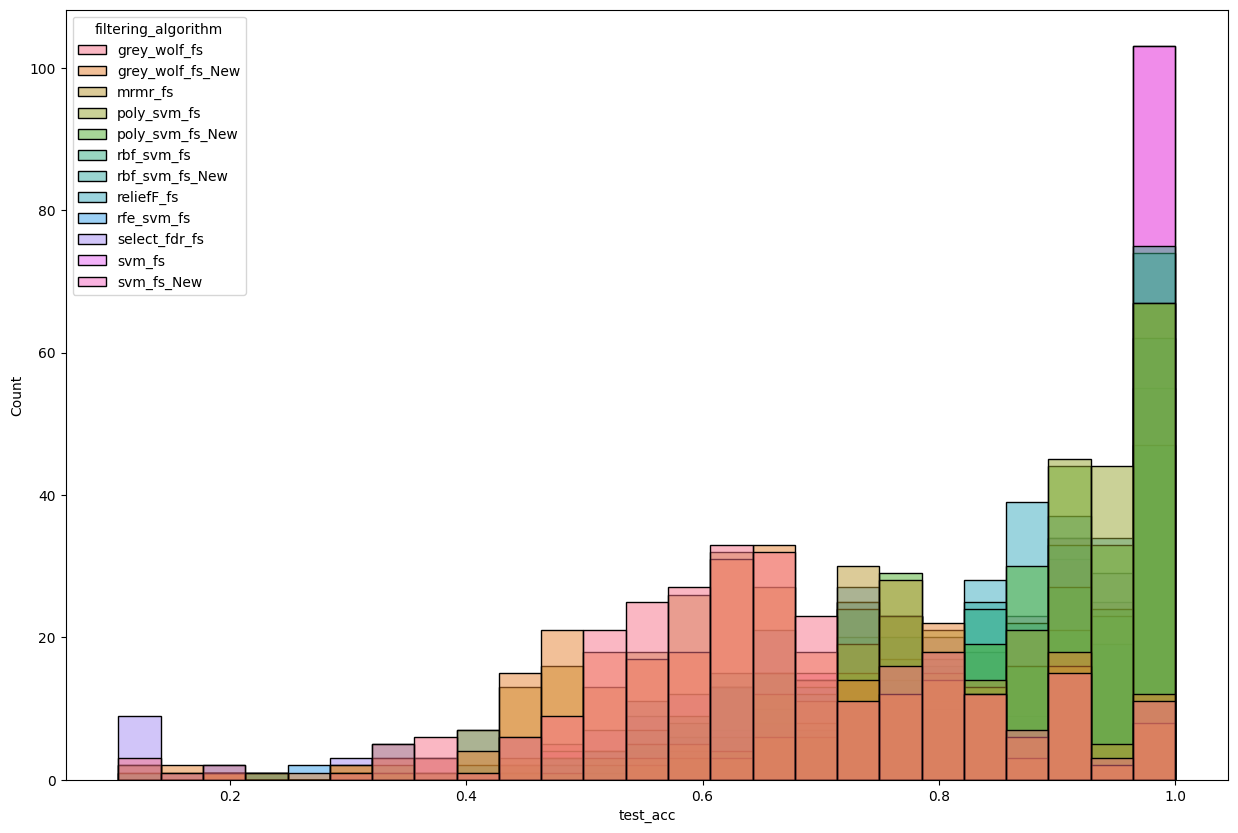

In [247]:
plt.figure(figsize=(15,10))
sns.histplot(data=mean_df, x=metric_col, hue="filtering_algorithm")

# Fit time

## Best Feature-Selection Fit Time per Dataset

In [248]:
metric_col = 'test_feature_selector_fit_time'

fs_df = df[~df['filtering_algorithm'].str.endswith('_Aug')].groupby(['dataset', 'filtering_algorithm'])[metric_col].max().reset_index()
min_df = fs_df.groupby(['dataset']).min()[metric_col].reset_index().join(fs_df.set_index(['dataset', metric_col]), on=['dataset', metric_col])
min_df

,dataset,test_feature_selector_fit_time,filtering_algorithm
0,ALL.csv,0.154255,select_fdr_fs
1,ALLAML.csv,0.075487,select_fdr_fs
2,Breast.csv,0.189027,select_fdr_fs
3,CLL-SUB-111.csv,0.091319,select_fdr_fs
4,CLL.csv,0.037594,reliefF_fs
5,CNS.csv,0.086190,select_fdr_fs
6,COIL20.csv,0.105482,select_fdr_fs
7,Carcinom.csv,0.147639,select_fdr_fs
8,Lung.csv,0.320681,select_fdr_fs
9,Lymphoma.csv,0.019393,select_fdr_fs


## Feature-Selection Fit Time Histograms

<AxesSubplot:xlabel='test_feature_selector_fit_time', ylabel='Count'>

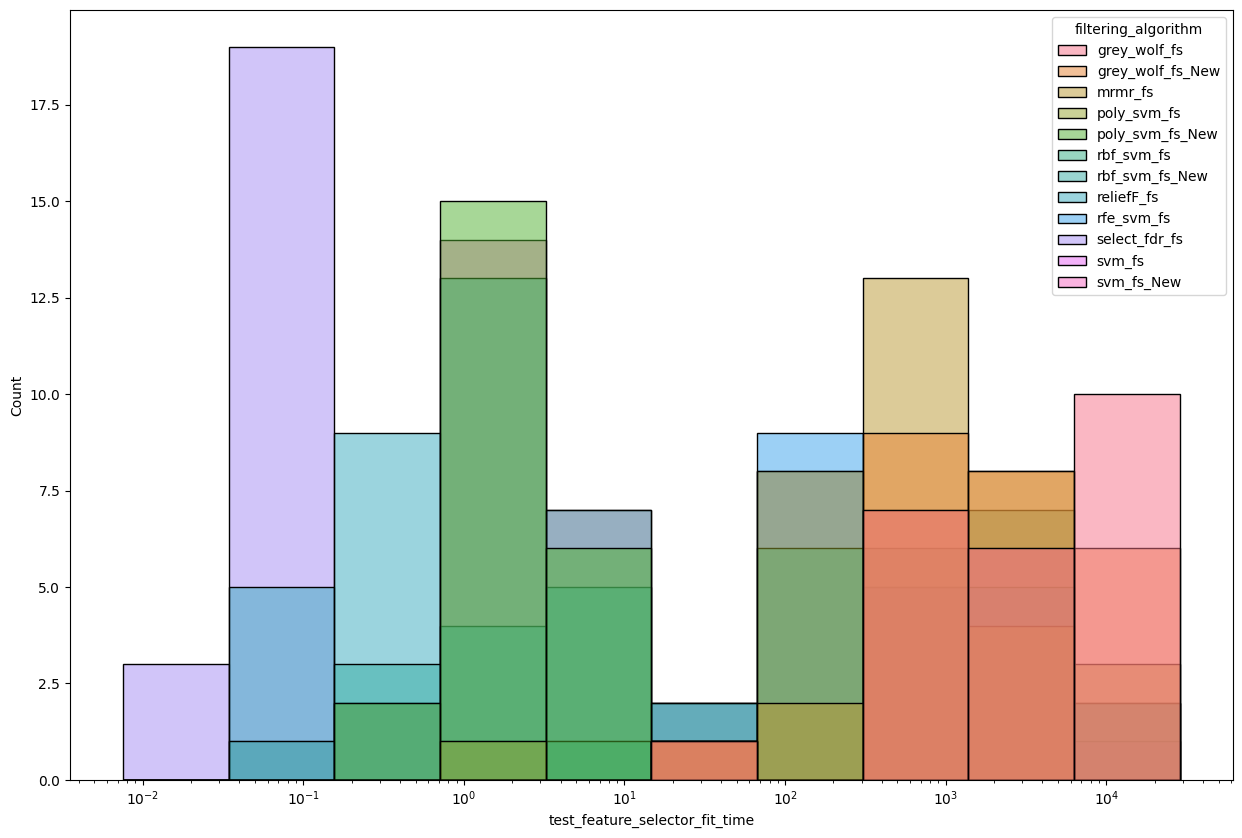

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.histplot(data=fs_df, x=metric_col, hue="filtering_algorithm", log_scale=True)

# Compare Original and New Versions

In [227]:
agg = {'test_roc_auc': 'mean', 'test_acc': 'mean'}
rename = {k:f'new_{k}' for k in agg.keys()}
experiment_cols = ['dataset', 'filtering_algorithm', 'n_selected_features', 'learning_algorithm'] # filtering_algorithm
new_df = df[df['filtering_algorithm'].str.endswith('_New')].groupby(experiment_cols).agg(agg).reset_index().rename(columns=rename)
new_df['filtering_algorithm'] = new_df['filtering_algorithm'].map(lambda x: x[:-len('_New')])

cmp_df = new_df.join(df.groupby(experiment_cols).agg(agg).reset_index().set_index(experiment_cols), on=experiment_cols)

stats = []
for k in agg.keys():
    for org_fs in cmp_df['filtering_algorithm'].unique():
        new_fs = f'{org_fs}_New'
        fs_df = cmp_df[(cmp_df['filtering_algorithm'] == org_fs) & (cmp_df[k] > 0)]
        is_better = (fs_df[f'new_{k}'] > fs_df[k])
        fs_df[f'better_mode_{k}'] = is_better.map(lambda x: 'New' if x else 'Original')
        fs_df[f'new_vs_org_{k}_percentage'] = fs_df.apply(lambda x: (100 * x[f'new_{k}'] / x[k]), axis=1)
        stats.append({
            'metric': k,
            'filtering_algorithm': org_fs,
            'frac_new_improved': len(fs_df[is_better]) / len(fs_df),
            'mean_new_vs_org_percentage': fs_df[f'new_vs_org_{k}_percentage'].mean()
        })
metrics_stats_df = pd.DataFrame(stats)
metrics_stats_df

C:\Users\adutl\AppData\Local\Temp\ipykernel_1232\3468443499.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\adutl\AppData\Local\Temp\ipykernel_1232\3468443499.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\adutl\AppData\Local\Temp\ipykernel_1232\3468443499.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,metric,filtering_algorithm,frac_new_improved,mean_new_vs_org_percentage
0,test_roc_auc,grey_wolf_fs,0.442428,103.955091
1,test_roc_auc,poly_svm_fs,0.356944,99.660429
2,test_roc_auc,rbf_svm_fs,0.337500,99.662274
3,test_roc_auc,svm_fs,0.350694,99.739867
4,test_acc,grey_wolf_fs,0.412500,99.953248
5,test_acc,poly_svm_fs,0.336806,99.867988
6,test_acc,rbf_svm_fs,0.300694,99.803939
7,test_acc,svm_fs,0.303472,99.961602


# Fit time

In [229]:
agg = {'test_feature_selector_fit_time': 'max'}
rename = {k:f'new_{k}' for k in agg.keys()}
experiment_cols = ['dataset', 'filtering_algorithm']
new_df = df[df['filtering_algorithm'].str.endswith('_New')].groupby(experiment_cols).agg(agg).reset_index().rename(columns=rename)
new_df['filtering_algorithm'] = new_df['filtering_algorithm'].map(lambda x: x[:-len('_New')])

cmp_df = new_df.join(df.groupby(experiment_cols).agg(agg).reset_index().set_index(experiment_cols), on=experiment_cols)

stats = []
for k in agg.keys():
    for org_fs in cmp_df['filtering_algorithm'].unique():
        new_fs = f'{org_fs}_New'
        fs_df = cmp_df[(cmp_df['filtering_algorithm'] == org_fs) & (cmp_df[k] > 0)]
        is_better = (fs_df[f'new_{k}'] < fs_df[k])
        fs_df[f'better_mode_{k}'] = is_better.map(lambda x: 'New' if x else 'Original')
        fs_df[f'new_vs_org_{k}_percentage'] = fs_df.apply(lambda x: (100 * x[f'new_{k}'] / x[k]), axis=1)
        stats.append({
            'metric': k,
            'filtering_algorithm': org_fs,
            'frac_new_improved': len(fs_df[is_better]) / len(fs_df),
            'mean_new_vs_org_percentage': fs_df[f'new_vs_org_{k}_percentage'].mean()
        })
fit_time_stats_df = pd.DataFrame(stats)
fit_time_stats_df

C:\Users\adutl\AppData\Local\Temp\ipykernel_1232\1504480098.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\adutl\AppData\Local\Temp\ipykernel_1232\1504480098.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\adutl\AppData\Local\Temp\ipykernel_1232\1504480098.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,metric,filtering_algorithm,frac_new_improved,mean_new_vs_org_percentage
0,test_feature_selector_fit_time,grey_wolf_fs,0.583333,102.129798
1,test_feature_selector_fit_time,poly_svm_fs,1.000000,1.092098
2,test_feature_selector_fit_time,rbf_svm_fs,1.000000,0.941075
3,test_feature_selector_fit_time,svm_fs,1.000000,1.520919


## Comparison Summary

In [230]:
stats_df = pd.concat([metrics_stats_df, fit_time_stats_df])
stats_df

,metric,filtering_algorithm,frac_new_improved,mean_new_vs_org_percentage
0,test_roc_auc,grey_wolf_fs,0.442428,103.955091
1,test_roc_auc,poly_svm_fs,0.356944,99.660429
2,test_roc_auc,rbf_svm_fs,0.337500,99.662274
3,test_roc_auc,svm_fs,0.350694,99.739867
4,test_acc,grey_wolf_fs,0.412500,99.953248
5,test_acc,poly_svm_fs,0.336806,99.867988
6,test_acc,rbf_svm_fs,0.300694,99.803939
7,test_acc,svm_fs,0.303472,99.961602
0,test_feature_selector_fit_time,grey_wolf_fs,0.583333,102.129798
1,test_feature_selector_fit_time,poly_svm_fs,1.000000,1.092098


# Compare Original vs Augmented Experiments

In [232]:
agg = {'test_roc_auc': 'mean', 'test_acc': 'mean', 'test_classifier_fit_time': 'mean'}
rename = {k:f'aug_{k}' for k in agg.keys()}
experiment_cols = ['dataset', 'filtering_algorithm', 'n_selected_features', 'learning_algorithm'] # filtering_algorithm
aug_df = df[df['filtering_algorithm'].str.endswith('_Aug')].groupby(experiment_cols).agg(agg).reset_index().rename(columns=rename)
aug_df['filtering_algorithm'] = aug_df['filtering_algorithm'].map(lambda x: x[:-len('_Aug')])

cmp_df = aug_df.join(df.groupby(experiment_cols).agg(agg).reset_index().set_index(experiment_cols), on=experiment_cols)

stats = []
for k in agg.keys():
    is_better = (cmp_df[f'aug_{k}'] < cmp_df[k]) if 'time' in k else (cmp_df[f'aug_{k}'] > cmp_df[k])
    cmp_df[f'better_mode_{k}'] = is_better.map(lambda x: 'Augmented' if x else 'Original')
    cmp_df[f'aug_vs_org_{k}_percentage'] = cmp_df.apply(lambda x: (100 * x[f'aug_{k}'] / x[k]), axis=1)
    stats.append({
        'metric': k,
        'frac_aug_improved': len(cmp_df[is_better]) / len(cmp_df),
        'all_mean_aug_vs_org_percentage': cmp_df[f'aug_vs_org_{k}_percentage'].mean()
    })
stats_df = pd.DataFrame(stats)
stats_df

,metric,frac_aug_improved,all_mean_aug_vs_org_percentage
0,test_roc_auc,0.208333,96.411472
1,test_acc,0.375000,98.325933
2,test_classifier_fit_time,0.541667,106.256998


# Friedman PostHoc Test

rejected null hypothesis
algorithm poly_svm_fs is significantly better than algorithms {'select_fdr_fs', 'reliefF_fs', 'svm_fs_New', 'svm_fs', 'mrmr_fs', 'rbf_svm_fs_New', 'grey_wolf_fs', 'grey_wolf_fs_New', 'rfe_svm_fs', 'rbf_svm_fs'} in terms of test_roc_auc
algorithm poly_svm_fs_New is significantly better than algorithms {'select_fdr_fs', 'reliefF_fs', 'svm_fs_New', 'svm_fs', 'mrmr_fs', 'rbf_svm_fs_New', 'grey_wolf_fs', 'grey_wolf_fs_New', 'rfe_svm_fs', 'rbf_svm_fs'} in terms of test_roc_auc
algorithm rbf_svm_fs is significantly better than algorithms {'mrmr_fs', 'grey_wolf_fs', 'grey_wolf_fs_New'} in terms of test_roc_auc
algorithm rbf_svm_fs_New is significantly better than algorithms {'mrmr_fs', 'grey_wolf_fs', 'grey_wolf_fs_New'} in terms of test_roc_auc
algorithm reliefF_fs is significantly better than algorithms {'mrmr_fs', 'grey_wolf_fs', 'grey_wolf_fs_New', 'rfe_svm_fs'} in terms of test_roc_auc
algorithm rfe_svm_fs is significantly better than algorithms {'mrmr_fs', 'grey_

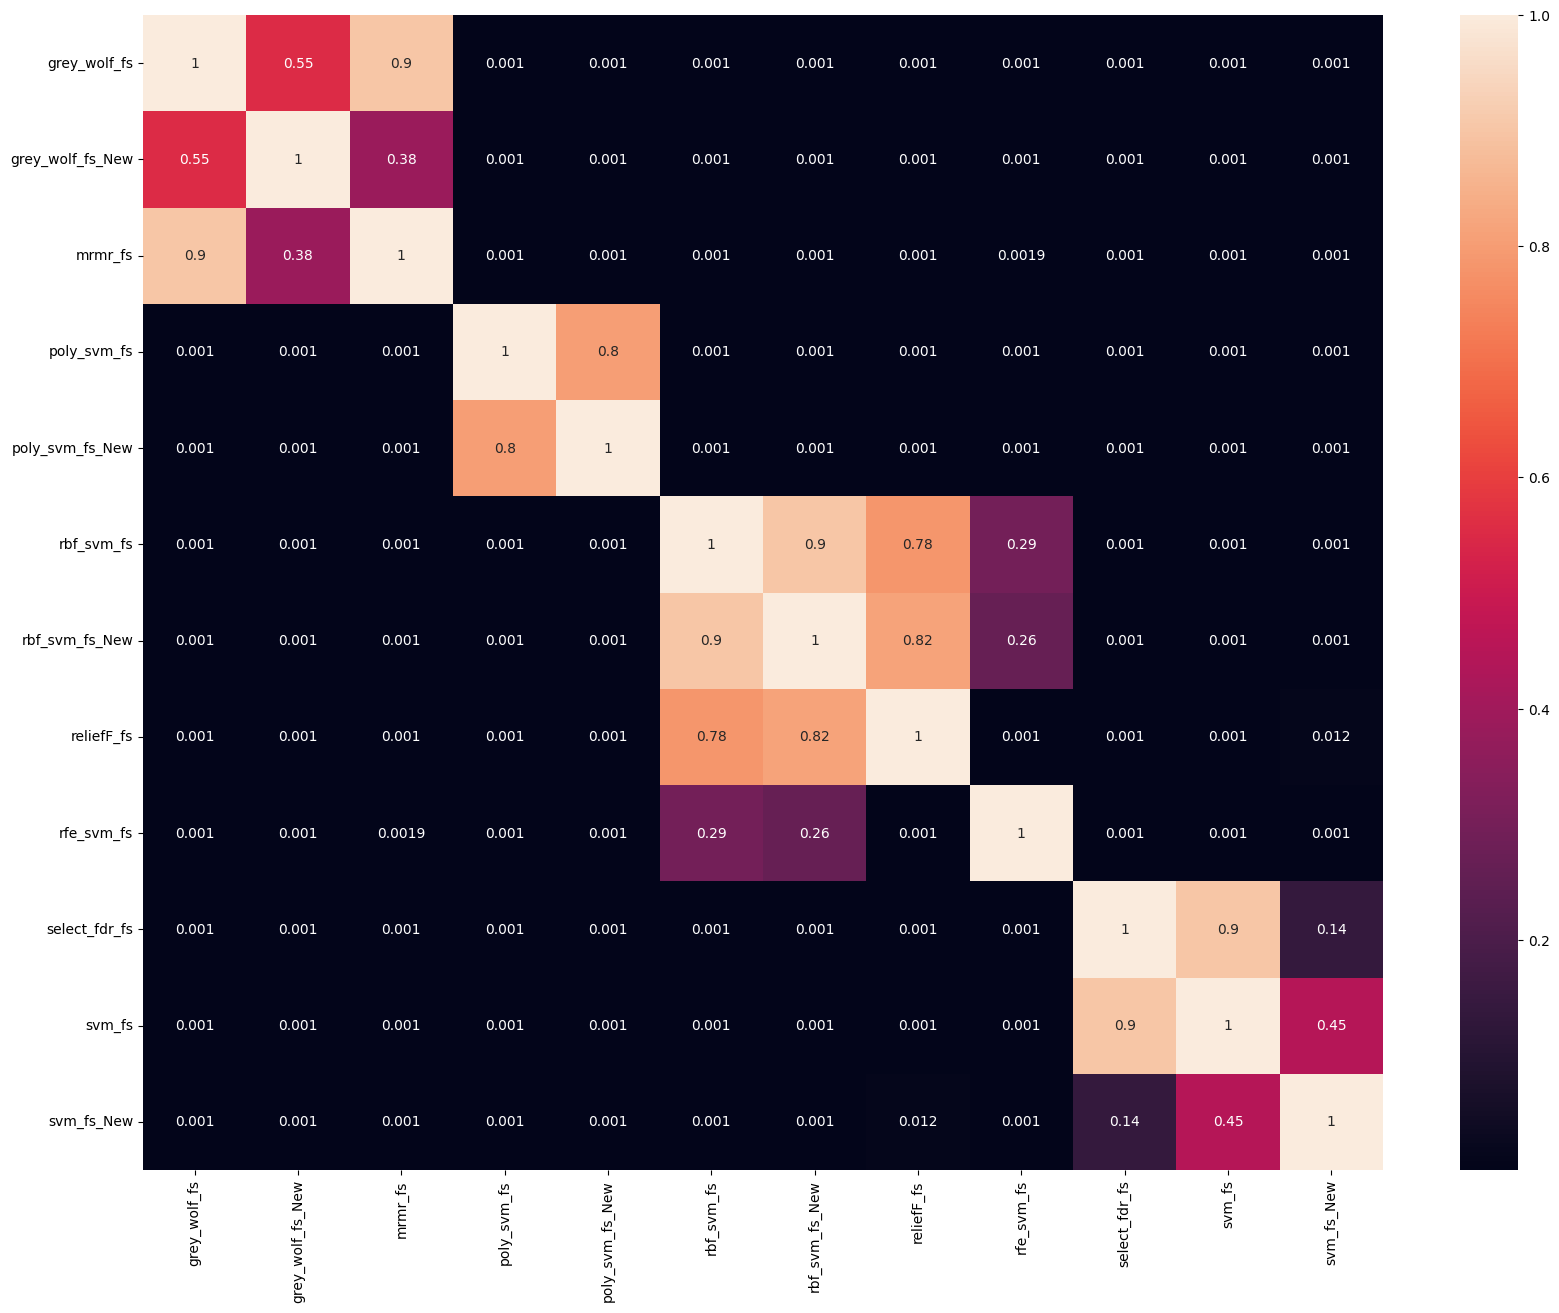

In [151]:
from friedman_posthoc_test import friedman_posthoc_test
friedman_posthoc_test(df[~df['filtering_algorithm'].str.endswith('_Aug')])